### Probemos un modelo de regresión


En esta clase, aprenderemos a predecir el precio de las viviendas utilizando Regresión Lineal. Vamos a trabajar con el Boston Housing Dataset, un conjunto de datos clásico en la inteligencia artificial.


#### Qué es la Regresión Lineal?

La Regresión Lineal es una técnica estadística que busca encontrar la mejor línea recta que relacione una variable independiente (X) con una variable dependiente (y).

Ejemplo intuitivo: Si sabemos que una casa con 4 habitaciones cuesta 200 mil dólares y una casa con 6 habitaciones cuesta 300 mil dólares, podemos usar la regresión lineal para predecir el precio de una casa con 5 habitaciones.


Descargar el dataset de acá:
https://www.kaggle.com/datasets/altavish/boston-housing-dataset?utm_source=chatgpt.com


In [ ]:
# Cargar las librerias importantes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Cargar el dataset
df = pd.read_csv("HousingData.csv")

In [ ]:
# Ver si se cargo correctamente
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Información del dataset:
- CRIM → Tasa de criminalidad per cápita por ciudad.
- ZN → Proporción de suelo residencial destinado a lotes de más de 25,000 pies cuadrados.
- INDUS → Proporción de acres de negocios no minoristas por ciudad.
- CHAS → Variable indicadora del Río Charles (1 si el área limita con el río, 0 en caso contrario).
- NOX → Concentración de óxidos nítricos (partes por 10 millones).
- RM → Número promedio de habitaciones por vivienda.
- AGE → Proporción de unidades ocupadas por propietarios construidas antes de 1940.
- DIS → Distancias ponderadas a cinco centros de empleo en Boston.
- RAD → Índice de accesibilidad a autopistas radiales.
- TAX → Tasa de impuesto a la propiedad por cada $10,000.
- PTRATIO → Relación alumnos-maestro por ciudad.
- B → 1000(Bk - 0.63)², donde Bk es la proporción de población negra por ciudad.
- LSTAT → % de población con nivel socioeconómico bajo.
- MEDV → Valor mediano de las viviendas ocupadas por sus propietarios (en miles de dólares)


#### Entender el Problema
En Boston, el precio de una casa depende de varios factores, como la cantidad de habitaciones, la tasa de criminalidad y la cercanía a servicios importantes.
Para simplificar, vamos a investigar si el número de habitaciones en una vivienda puede predecir su precio.


#### Definir las Variables
En una regresión lineal, necesitamos dos tipos de variables:

Variable Independiente (X): Número promedio de habitaciones por vivienda (RM).  
Variable Dependiente (y): Precio medio de la vivienda en miles de dólares (MEDV).  

Pregunta clave: Si una casa tiene más habitaciones, ¿su precio será más alto?

#### Explorar los Datos


In [41]:
# Ver estadísticas generales del dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [42]:
# Verificar si hay valores nulos
print(df.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


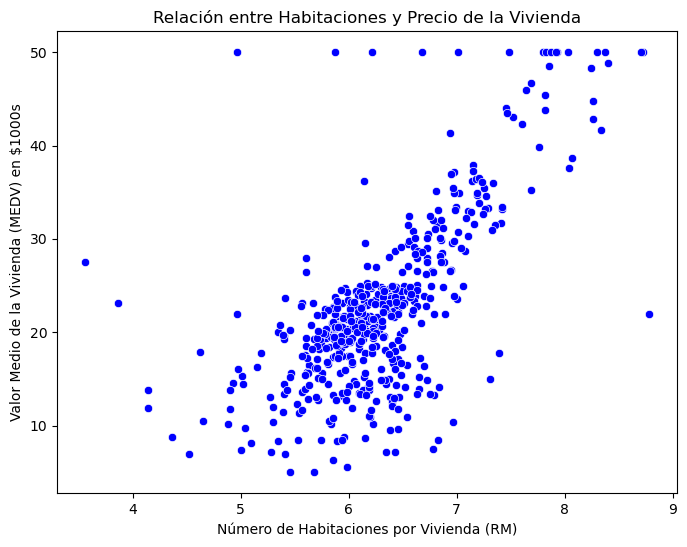

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["RM"], y=df["MEDV"], color="blue")
plt.xlabel("Número de Habitaciones por Vivienda (RM)")
plt.ylabel("Valor Medio de la Vivienda (MEDV) en $1000s")
plt.title("Relación entre Habitaciones y Precio de la Vivienda")
plt.show()

¿Qué podemos ver en este gráfico?

....

#### Entrenar el Modelo de Regresión Lineal

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [46]:
# Definir las variables
X = df[["RM"]]  # Variable independiente: Número de habitaciones
y = df["MEDV"]  # Variable dependiente: recio de la vivienda


In [34]:
# Dividir los datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


IMPORTANTE:

- train_test_split divide los datos en un conjunto de entrenamiento (80%) y otro de prueba (20%).

- random_state=42 garantiza que siempre obtenemos los mismos resultados.

In [ ]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)


LinearRegression()

#### Evaluación del modelo

In [ ]:
from sklearn.metrics import mean_absolute_error

In [47]:
# Hacer predicciones
y_pred = modelo.predict(X_test)

# Calcular el error
error = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio: {error:.2f}")

Error Absoluto Medio: 4.48


Si el error es bajo, el modelo predice bien los precios.

Si el error es alto, quizás necesitemos agregar más variables.


#### Visualización de la Regresión

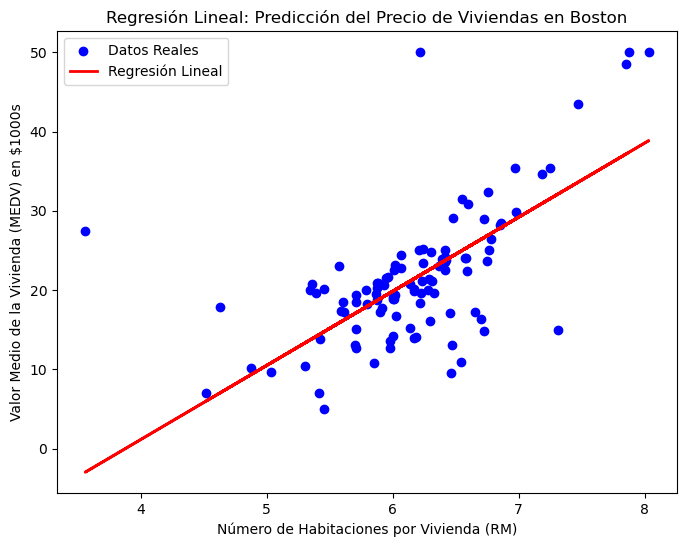

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="blue", label="Datos Reales")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión Lineal")
plt.xlabel("Número de Habitaciones por Vivienda (RM)")
plt.ylabel("Valor Medio de la Vivienda (MEDV) en $1000s")
plt.title("Regresión Lineal: Predicción del Precio de Viviendas en Boston")
plt.legend()
plt.show()

Los puntos azules son los datos reales.  
La línea roja es la predicción del modelo.  
Si la línea sigue bien los puntos, significa que el modelo funciona bien.

In [37]:
# Hacer predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

# Mostrar los primeros resultados
resultados = pd.DataFrame({"Habitaciones": X_test["RM"], "Precio Real": y_test, "Precio Predicho": y_pred})
resultados.head()

,Habitaciones,Precio Real,Precio Predicho
173,6.416,23.6,23.732383
274,6.758,32.4,26.929502
491,5.983,13.6,19.684568
72,6.065,22.8,20.451129
452,6.297,16.1,22.619935


Hacemos predicciones con los datos de prueba.  
Mostramos una tabla comparando los valores reales y los predichos.

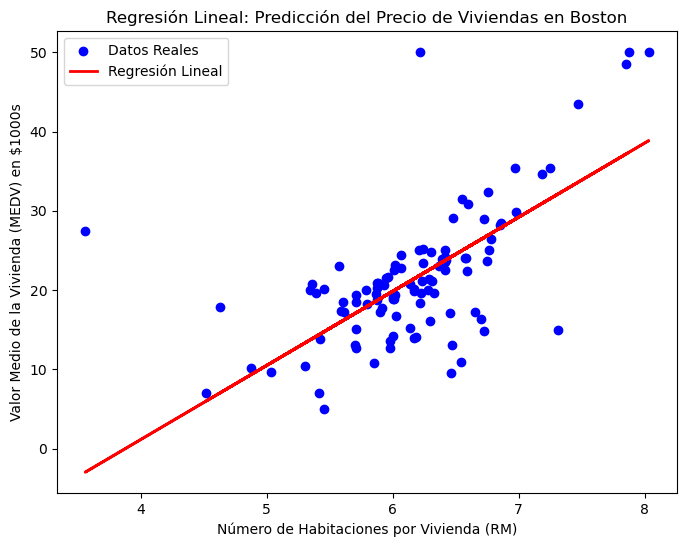

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="blue", label="Datos Reales")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión Lineal")
plt.xlabel("Número de Habitaciones por Vivienda (RM)")
plt.ylabel("Valor Medio de la Vivienda (MEDV) en $1000s")
plt.title("Regresión Lineal: Predicción del Precio de Viviendas en Boston")
plt.legend()
plt.show()



Pasos siguientes...
Podemos mejorar la predicción agregando más variables (como LSTAT o CRIM).
- CRIM → Tasa de criminalidad per cápita por ciudad.
- LSTAT → % de población con nivel socioeconómico bajo.



### ¿Que falta en este ejemplo?
Si bien en este ejercicio hemos aplicado una regresión lineal básica, existen varios pasos adicionales que pueden mejorar la precisión y confiabilidad del modelo:

#### 1. Limpieza de Datos:
Eliminar valores nulos o incorrectos.
Identificar y tratar valores atípicos (outliers).

#### 2. Normalización y Escalado:
Convertir todas las variables a una escala similar para evitar que algunas dominen el modelo.
En Python, puedes usar StandardScaler o MinMaxScaler de sklearn.preprocessing.

####  3. Agregar Más Variables Predictoras:
En lugar de usar solo RM, podríamos incluir LSTAT (porcentaje de población de bajo estatus) y CRIM (tasa de criminalidad).
La Regresión Múltiple permite usar varias variables para mejorar la predicción.

#### 4. Transformaciones de Variables:
Si los datos no siguen una distribución lineal, aplicar transformaciones como logaritmos, raíces cuadradas o polinomios puede mejorar el ajuste.

#### 5. Evaluar con Métricas Avanzadas:
Además del Error Absoluto Medio (MAE), podemos calcular:
R² (Coeficiente de determinación) con modelo.score(X_test, y_test).
Error Cuadrático Medio (MSE) con mean_squared_error(y_test, y_pred).

#### 6. Validación Cruzada:
En lugar de dividir una sola vez en entrenamiento y prueba, podemos usar validación cruzada (cross_val_score) para verificar la estabilidad del modelo.
